In [0]:
# Step 1:  upload files in Google Drive

from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
# Step 2 : We are just checking whether the files are there in the drive

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test.csv" with length 451405 bytes
User uploaded file "train.csv" with length 460676 bytes


In [0]:
# Step 3: We are going to see first few records in the dataset

import io
import pandas as pd

df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
print(df_train.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [0]:
df_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
print(df_test.head())

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [0]:
# Revision from part 1
'''
 -- Understand the problem statement which is to predict the SalePrice
 -- Understand the data set given
 -- Upload the data in Google Colab
 -- Display the first few records

'''

'\n -- Understand the problem statement which is to predict the SalePrice\n -- Understand the data set given\n -- Upload the data in Google Colab\n -- Display the first few records\n\n'

In [0]:
#First let's see how many missing values are there?

#Missing value counts in each columns

missing_count = (df_train.isnull().sum() / len(df_train)) * 100

# Filter to find the missing count > 0

missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


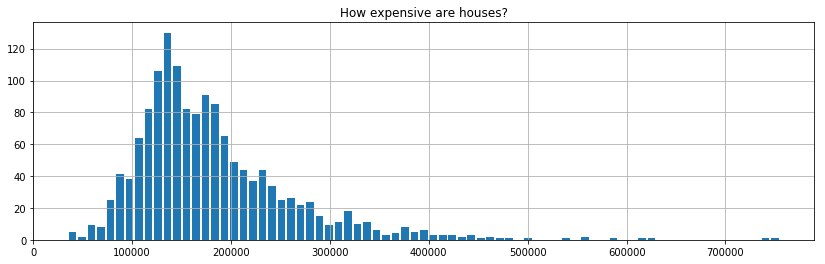

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df_train.SalePrice.min(), df_train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df_train.SalePrice.mean(), df_train.SalePrice.median()))
df_train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [0]:
# We need to handle the missing columns.


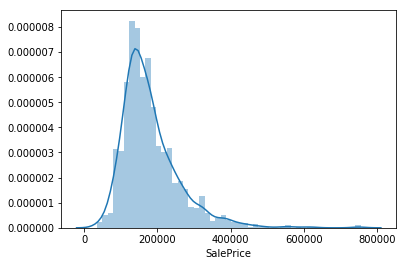

In [0]:
import seaborn as sns

sns.distplot(df_train['SalePrice'])

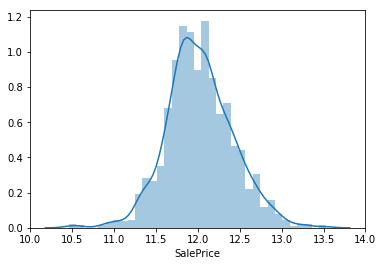

In [0]:
# Most machine learning algorithm works well with data which are normally distributed

# Let's transform the target (SalePrice) variable by taking log scale
import numpy as np

target = np.log(df_train['SalePrice'])

sns.distplot(target)

In [0]:
import numpy as np
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])


# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))


There are 38 numerical and 43 categorical features in the training data


In [0]:


numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

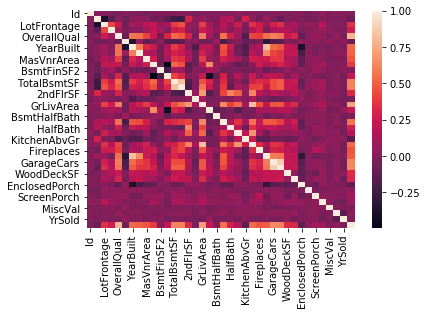

In [0]:
# Correlation plot of the features in numeric_data

corr = numeric_data.corr()

# Plot the correlation matrix

sns.heatmap(corr)

In [0]:
# Revision from part 2
'''
 -- We have tried to understand ANOVA method by hand
 -- But before we can start implementing ANOVA method on Categorical data we have to few other activities which we will learn in next couple of videos

'''

'\n -- We have tried to understand ANOVA method by hand\n -- But before we can start implementing ANOVA method on Categorical data we have to few other activities which we will learn in next couple of videos\n\n'

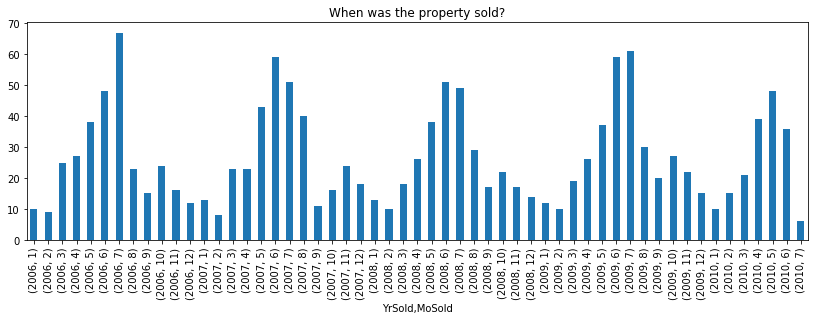

In [0]:
# When was the property sold in which year and month

import matplotlib.pyplot as plt
%matplotlib inline

df_train.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title("When was the property sold?")
plt.show()

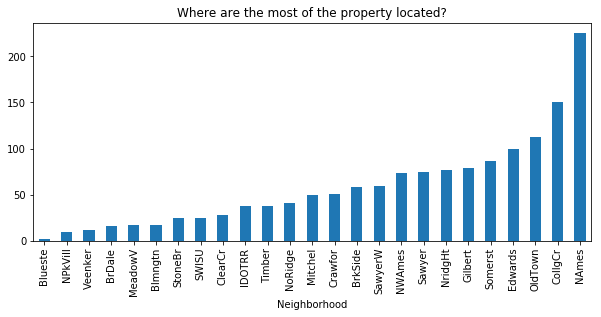

In [0]:
#Where are the property located?

df_train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='bar', figsize=(10,4))
plt.title('Where are the most of the property located?')
plt.show()

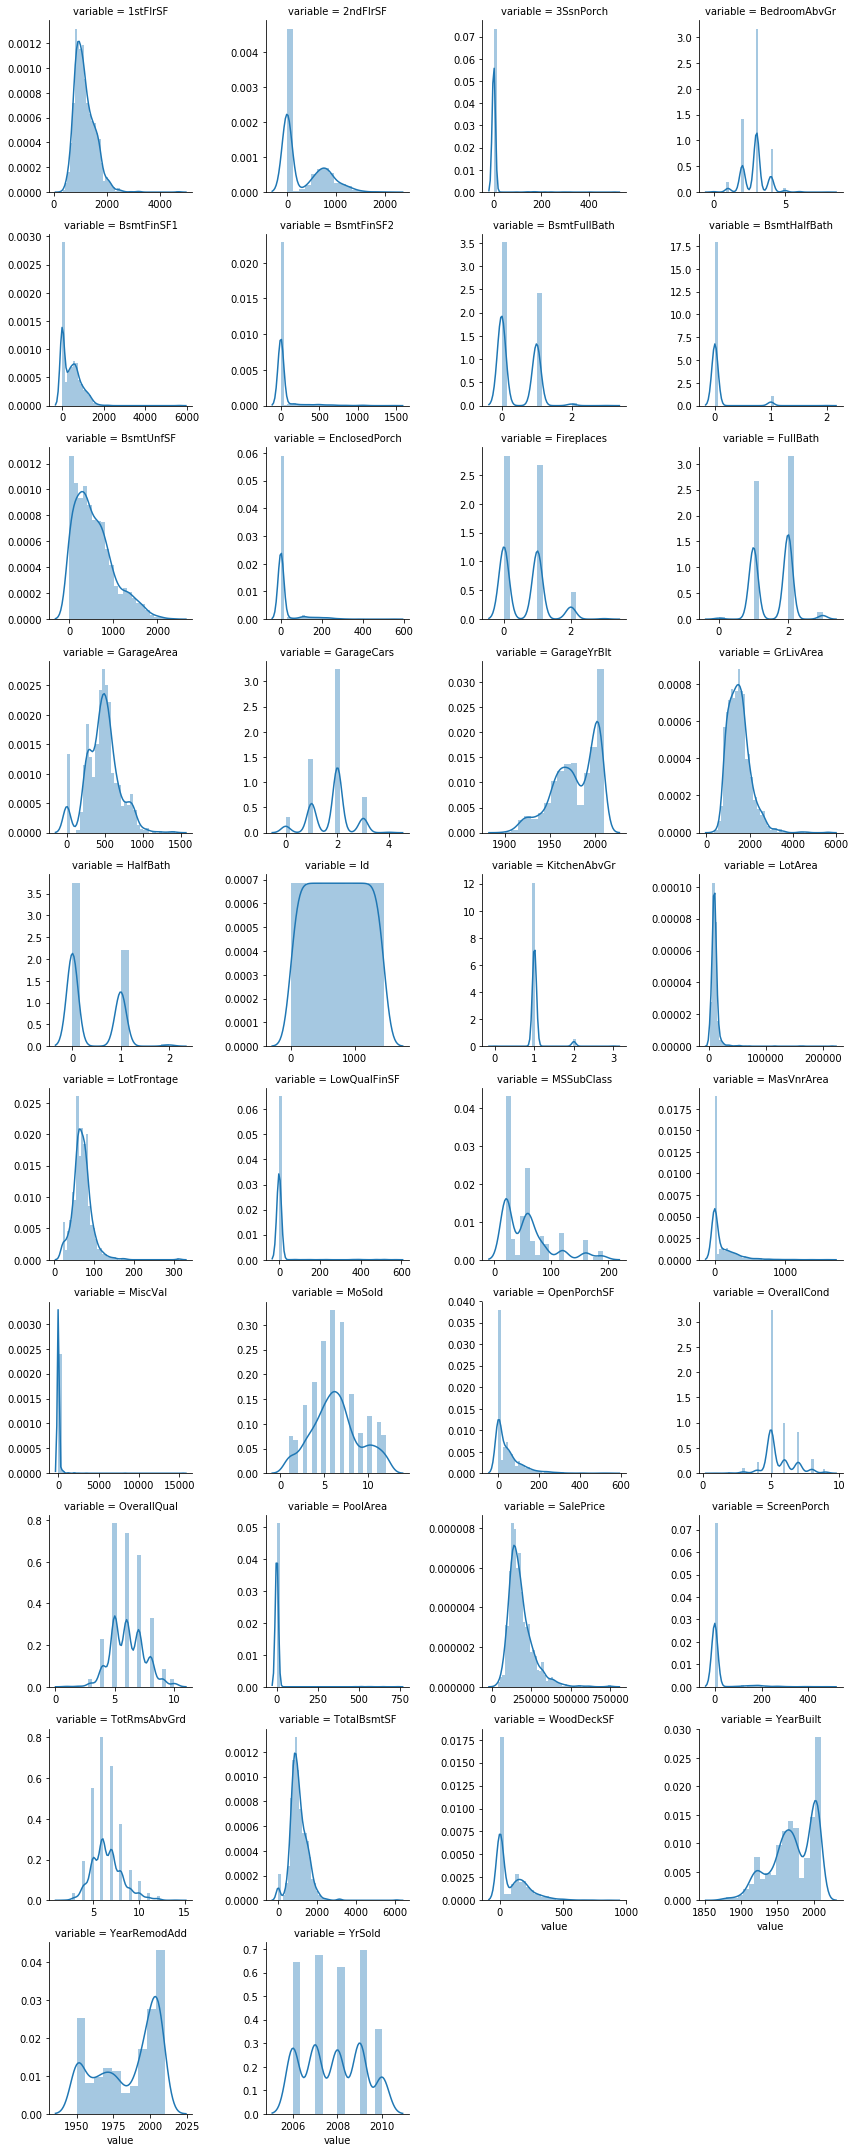

In [0]:
#Distribution of numerical features 

f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [0]:
#Conversion from Numeric feature to Category features

df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['MoSold'] = df_train.MoSold.apply(lambda x: str(x))
df_train['YrSold'] = df_train.YrSold.apply(lambda x: str(x))

In [0]:
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])


# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 35 numerical and 46 categorical features in the training data


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


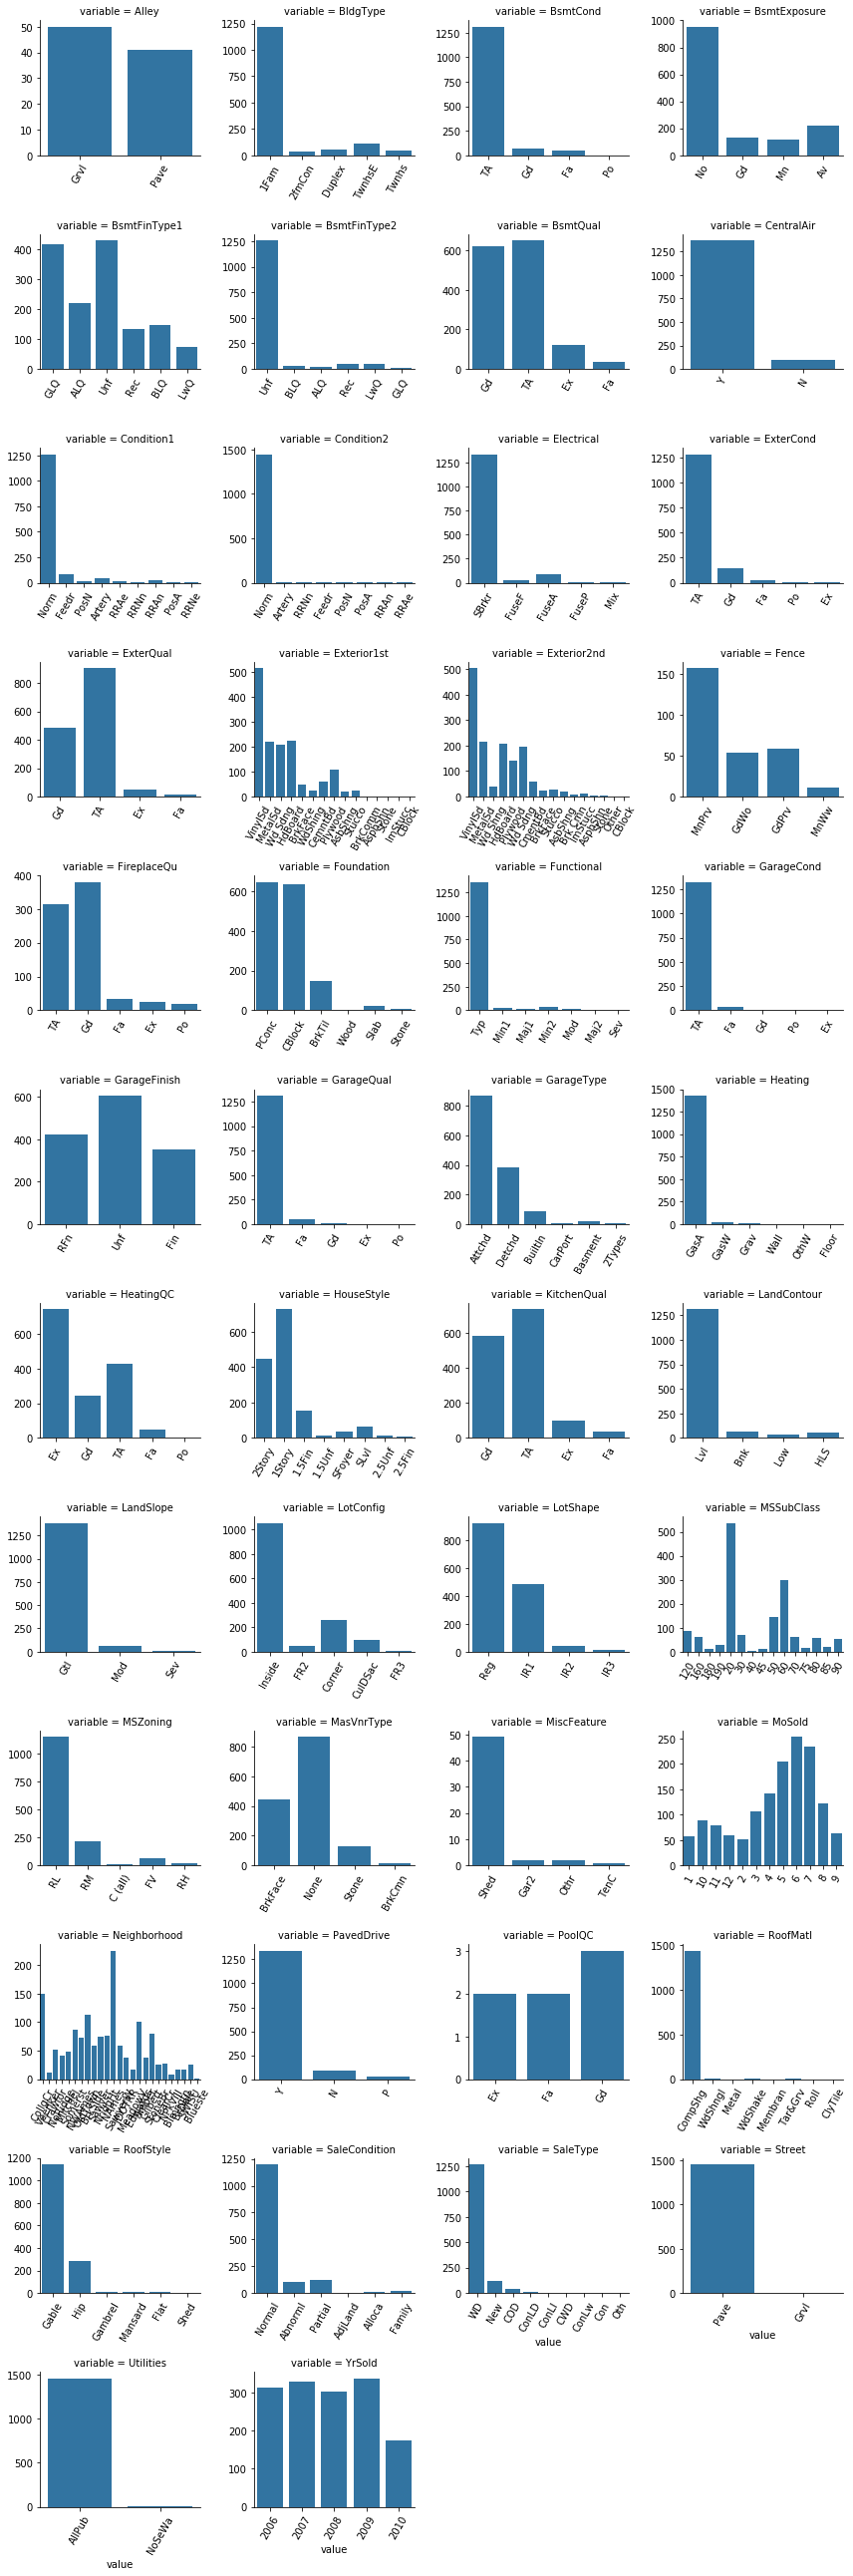

In [0]:
#Let's plot count of categorical features

f = pd.melt(df_train, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


In [0]:
df_train.Alley.replace({'Grvl':1, 'Pave':2},inplace=True)

In [0]:
df_train['Alley'].unique()

array([nan,  1.,  2.])

In [0]:
'''
Categorical column whose text/string values to be converted to numerical values

Alley, LotShape, LandContour, Utilities, LandSlope, ExterQual, 
ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, 
HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC

'''

'\nCategorical column whose text/string values to be converted to numerical values\n\nAlley, LotShape, LandContour, Utilities, LandSlope, ExterQual, \nExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, \nHeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC\n\n'

In [0]:
# Lot Shape
df_train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
df_train.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
df_train.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
df_train.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
df_train.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
df_train.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
df_train.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
df_train.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
df_train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
df_train.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
df_train.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
df_train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
df_train.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
df_train.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
df_train.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
df_train.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
df_train.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
df_train.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
df_train.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
df_train.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [0]:
cat_to_num_features = ['Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual',\
'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'PoolQC']


df_train[cat_to_num_features]=df_train[cat_to_num_features].fillna(0)


In [0]:
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])


# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 56 numerical and 25 categorical features in the training data


In [0]:
'''
Rating types - ExterQual

Ex - Excellent
Gd - Good
TA - Average/Typical
Fa - Fair
Po - Poor
'''

'\nRating types - ExterQual\n\nEx - Excellent\nGd - Good\nTA - Average/Typical\nFa - Fair\nPo - Poor\n'

In [0]:
#Few correction over the time

In [0]:
#Box plot to analyse the means of categorical features
# Null Hypothesis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


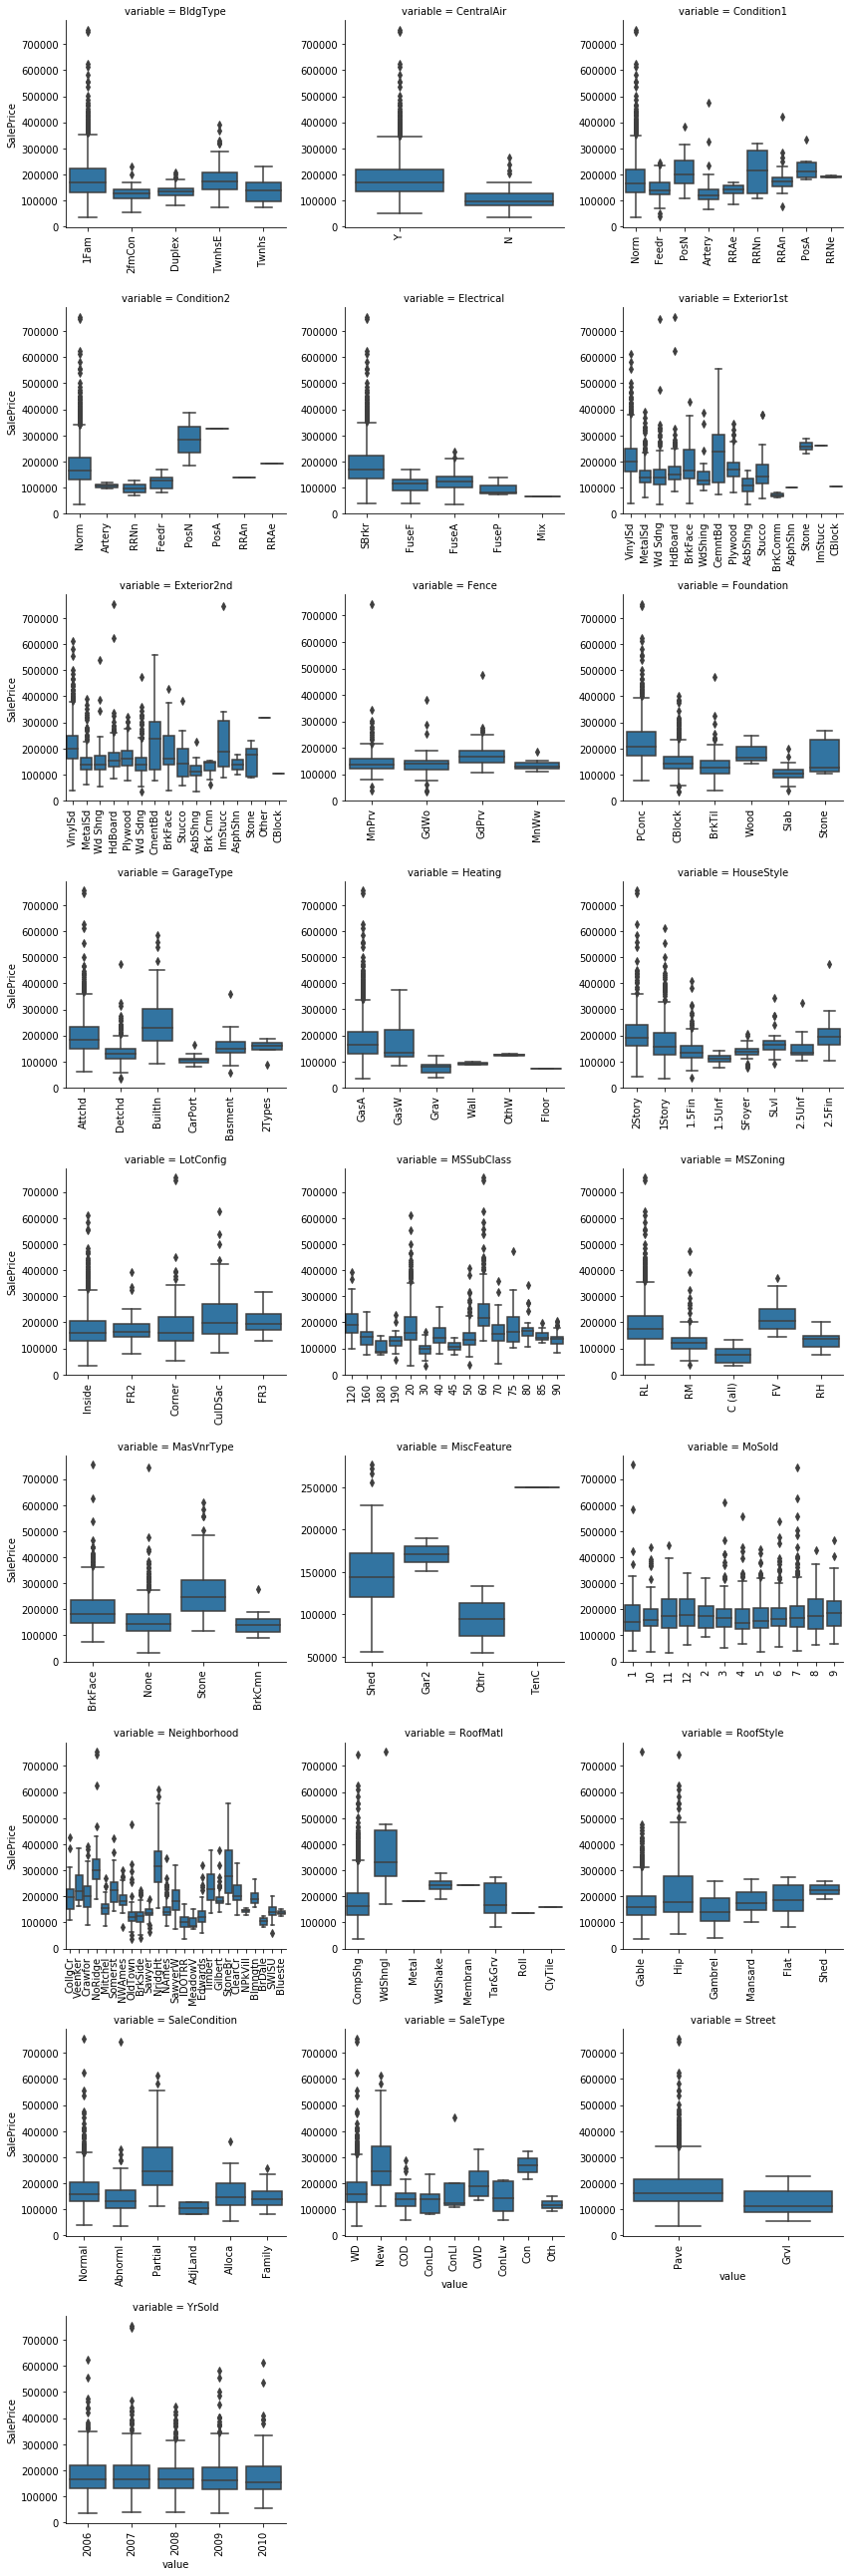

In [0]:
# Count plots of categorical features
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [0]:
import scipy.stats
cat_features = categorical_data.columns



#Filling nulls with "missing" as value
df_train[cat_features] = df_train[cat_features].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in df_train[cat].unique():
        group_prices.append(df_train[df_train[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)



In [0]:
anova



,feature,f,p
4,Neighborhood,71.784865,1.558600e-225
14,Foundation,100.253851,5.791895e-91
18,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
13,MasVnrType,84.672201,1.054025e-64
24,SaleCondition,45.578428,7.988268e-44
11,Exterior1st,18.611743,2.586089e-43
12,Exterior2nd,17.500840,4.842186e-43
23,SaleType,28.863054,5.039767e-42
1,MSZoning,43.840282,8.817634e-35


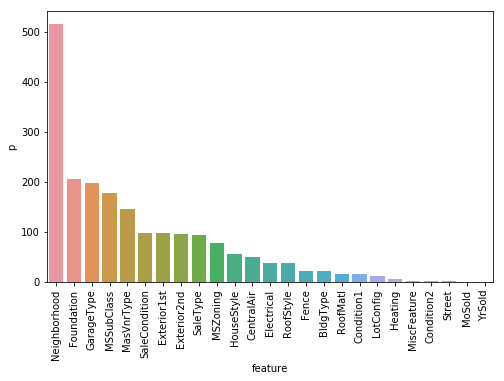

In [0]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

In [0]:
#Handling missing values

In [0]:
missing_values = (df_train[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

df_train.loc[df_train.Electrical == 'Missing', 'Electrical'] = df_train.Electrical.mode()[0]



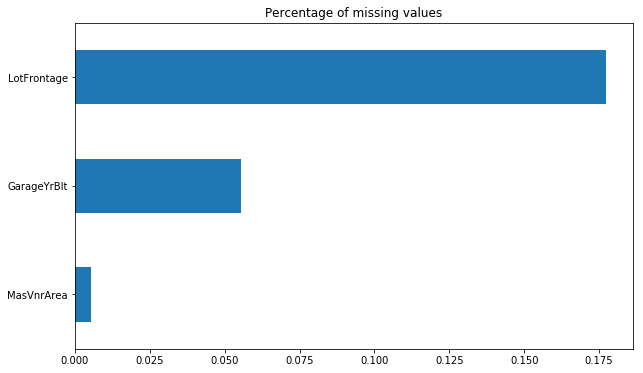

In [0]:
import matplotlib.pyplot as plt
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [0]:
#Lot Frontage (how can there be no street infront of the lot) Hence we replace it with the median value.
df_train.LotFrontage = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#Garage Year Built, if missing we can set it to zero
df_train.GarageYrBlt.fillna(0, inplace=True)

#Masonary Veneer Area here most values are zero
df_train.MasVnrArea.fillna(0, inplace=True)


In [0]:
#Let's closely look into the MasVnrType field here

#First let's correct our assignment
df_train.MasVnrType.replace({'Missing':'None'}, inplace=True)

#Second, we are going to replace them with the mean value

df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' # most common 
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea == 1), 'MasVnrArea'] = 0 # 1 sq ft is basically 0
for vnr_type in df_train.MasVnrType.unique():
    # so here we set the area equal to the mean of the given veneer type
    df_train.loc[(df_train.MasVnrType == vnr_type) & (df_train.MasVnrArea == 0), 'MasVnrArea'] = \
        df_train[df_train.MasVnrType == vnr_type].MasVnrArea.mean() 

In [0]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [0]:
#Check whether duplicates are available

print('Train set duplicate IDs: {}'.format(df_train.duplicated('Id').sum()))
print('Test set duplicate IDs: {}'.format(df_test.duplicated('Id').sum()))

Train set duplicate IDs: 0
Test set duplicate IDs: 0


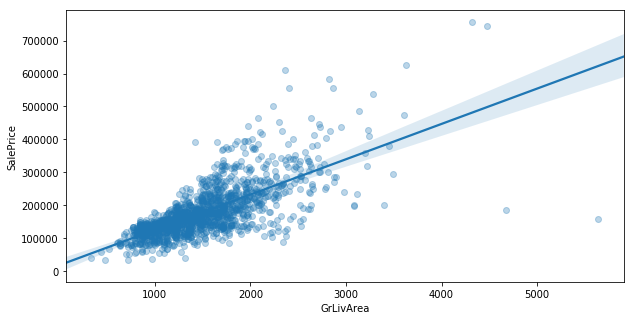

In [0]:
#Check for outliers

plt.figure(figsize=(10,5))
sns.regplot(df_train.GrLivArea, df_train.SalePrice, scatter_kws={'alpha':0.3})
plt.show()



In [0]:
df_train.drop(df_train[df_train.GrLivArea >= 4000].index, inplace=True)
#Removing houses which has more than 4000 sq ft.



In [0]:
#Calculating total square feet (area)
df_train['TotalSF'] = df_train.TotalBsmtSF + df_train.GrLivArea
df_train['TotalFloorSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalPorchSF'] = df_train.OpenPorchSF + df_train.EnclosedPorch + \
    df_train['3SsnPorch'] + df_train['ScreenPorch']

In [0]:
#Now let's create some boolean features (Yes-No type)

df_train['HasBasement'] = df_train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasGarage'] = df_train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPorch'] = df_train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPool'] = df_train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
df_train['WasRemodeled'] = (df_train.YearRemodAdd != df_train.YearBuilt).astype(np.int64)
df_train['IsNew'] = (df_train.YearBuilt > 2000).astype(np.int64)
df_train['WasCompleted'] = (df_train.SaleCondition != 'Partial').astype(np.int64)

In [0]:
boolean_features = ['HasBasement', 'HasGarage','HasPorch','HasPool','WasRemodeled','IsNew','WasCompleted']

In [0]:
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])


# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns

There are 66 numerical and 25 categorical features in the training data


In [0]:
num_features = [f for f in num_features if f not in boolean_features]

In [0]:
#Total Bathrooms

df_train['TotalBathrooms'] = df_train.FullBath + .5 * df_train.HalfBath + \
    df_train.BsmtFullBath + .5 * df_train.BsmtHalfBath


In [0]:
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])


# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns
num_features = [f for f in num_features if f not in boolean_features]

There are 67 numerical and 25 categorical features in the training data


In [0]:
#What's next - Part 9
Log transformation 
One-hot encoding for handling our categorical features
Data Modeling - lasso regression, ridge regression kind of analysis 


In [0]:
features = num_features + ['SalePrice']
for f in features:
    df_train.loc[:,f] = np.log1p(df_train[f])

In [0]:
#y = df_train['SalePrice']
#df_train.drop('SalePrice', axis=1, inplace=True)
#df_train.drop('Id', axis=1, inplace=True)

#Get dummies one-hot encoding method
#model_data = pd.get_dummies(df_train).copy()

model_data.head()


,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.646667,2.306780,0.0,0.526589,0.959135,0.959135,0.869742,1.124748,1.026672,2.152099,2.152099,1.837880,0.959135,0.869742,0.959135,0.869742,0.526589,1.080418,2.023008,0.526589,0.0,1.794635,2.048136,1.026672,2.048136,2.047835,0.0,2.133555,0.526589,0.000000,0.741276,0.526589,0.869742,0.526589,0.959135,1.162283,1.162283,0.000000,0.000000,2.152099,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.685370,2.319405,0.0,0.526589,0.959135,0.959135,0.869742,1.080418,1.162283,2.150521,2.150521,0.000000,0.869742,0.869742,0.959135,0.869742,0.959135,1.026672,2.065156,0.526589,0.0,1.894991,2.096943,1.026672,2.096943,0.000000,0.0,2.096943,0.000000,0.526589,0.741276,0.000000,0.869742,0.526589,0.869742,1.080418,1.162283,0.526589,0.869742,2.150521,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.655196,2.334879,0.0,0.741276,0.959135,0.959135,0.869742,1.124748,1.026672,2.151983,2.152041,1.807264,0.959135,0.869742,0.959135,0.869742,0.741276,1.080418,1.972450,0.526589,0.0,1.956616,2.057383,1.026672,2.057383,2.049631,0.0,2.138688,0.526589,0.000000,0.741276,0.526589,0.869742,0.526589,0.959135,1.080418,1.162283,0.526589,0.869742,2.151983,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.631370,2.318892,0.0,0.741276,0.959135,0.959135,0.869742,1.124748,1.026672,2.146866,2.150167,0.000000,0.869742,0.869742,0.869742,0.959135,0.526589,1.026672,1.853152,0.526589,0.0,1.986972,2.032004,0.959135,2.062933,2.032004,0.0,2.134038,0.526589,0.000000,0.526589,0.000000,0.869742,0.526589,0.959135,1.124748,1.162283,0.526589,0.959135,2.151809,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1.694266,2.357574,0.0,0.741276,0.959135,0.959135,0.869742,1.162283,1.026672,2.151925,2.151925,1.925822,0.959135,0.869742,0.959135,0.869742,0.869742,1.080418,2.013056,0.526589,0.0,1.973587,2.084931,1.026672,2.084931,2.074473,0.0,2.162835,0.526589,0.000000,0.741276,0.526589,0.959135,0.526589,0.959135,1.194706,1.162283,0.526589,0.869742,2.151925,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

Shapes
X_train: (1019, 263)
X_val: (437, 263)
y_train: (1019,)
y_val: (437,)


In [0]:
from sklearn.preprocessing import RobustScaler, StandardScaler

#Remove Id and SalePrice from num_features
num_features.remove('Id')
num_features.remove('SalePrice')

#Reason is to make feature means at 0 with standard deviation of 1
stdsc = StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.transform(X_test[num_features])

#Note we're only standardizing numerical features, not the dummy features.

In [0]:
from sklearn.model_selection import cross_val_score

def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [0]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(
    rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.00122 | Test RSME: 0.00125 | alpha: 0.00005


LASSO dropped 232 of 263 features.


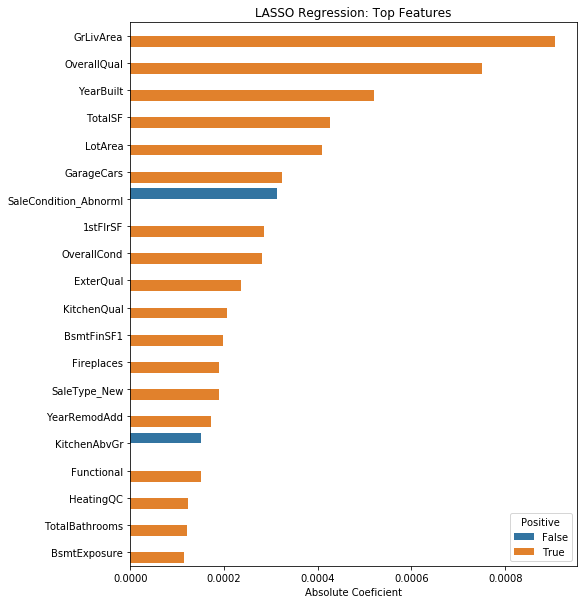

In [0]:
import seaborn as sns
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

In [0]:
#Now let's apply machine learning XGBoost library

import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

regr.fit(X_train[top_coefs.index], y_train)










/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=1, subsample=0.2, verbosity=1)

In [0]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(X_test[top_coefs.index])

print("XGBoost score on training set: ", rmse(y_test, y_pred))


XGBoost score on training set:  0.0046358954915304415
